# Scipy Assignment
Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [154]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [155]:
months = np.arange(12)
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Text(0, 0.5, 'Min and max temperature')

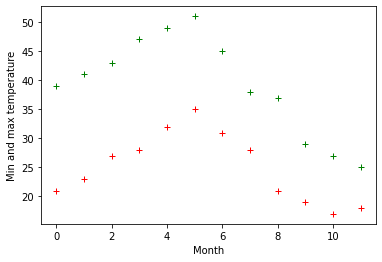

In [156]:
plt.plot(months, max_temp, 'g+')
plt.plot(months, min_temp, 'r+')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [157]:
#Periodic Function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
     return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
#Curve fitting: 
res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp, [-40,20,0])
print('res_max:',res_max)
print('res_min:',res_min)

res_max: [ 39.88861734 -10.59083168   1.33370154]
res_min: [25.55626462 -7.74472963  0.93101294]


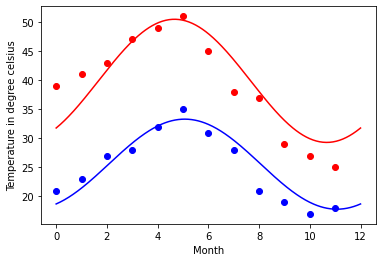

In [160]:
 days = np.linspace(0, 12, num=365)
 plt.figure()
 plt.plot(months, max_temp, 'ro')
 plt.plot(days, yearly_temps(days, *res_max), 'r-')
 plt.plot(months, min_temp, 'bo')
 plt.plot(days, yearly_temps(days, *res_min), 'b-')
 plt.xlabel('Month')
 plt.ylabel('Temperature in degree celsius')
 plt.show()
 #yearly_temps(days, *res_max)

# MatplotLib Assignment
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [162]:
titanic= pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


Text(0.5, 1.0, 'Male/Female proportion Piechart')

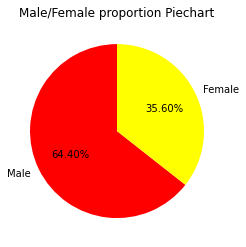

In [163]:
#1. male and female data portion as piechart
count=titanic['sex'].value_counts()
sex=count.to_list()
pielabels='Male', 'Female'
colors = ['red', 'yellow']
f, ax1 = plt.subplots()
ax1.pie(sex, labels=pielabels, colors=colors,startangle=90,
        autopct='%1.2f%%')
ax1.set_title('Male/Female proportion Piechart')


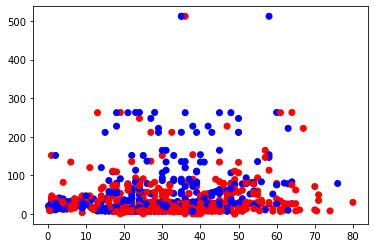

In [164]:
#2. Scatter Plot with Fare Paid and Age with plot color by gender
def plotcolor(lst):
    cols=[]
    for l in lst:
        if l=='male':
            cols.append('red')
        elif l=='female':
            cols.append('blue')
        else:
            cols.append('green')
    return cols

cols=plotcolor(titanic['sex'])

fig2, ax2 = plt.subplots()
ax2.scatter(titanic['age'], titanic['fare'],c=cols)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         red
1       green
2         red
3       green
4         red
        ...  
1305      red
1306    green
1307    green
1308    green
1309      NaN
Name: sex, Length: 1310, dtype: object

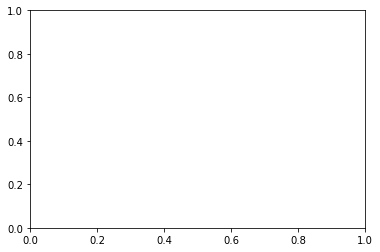

In [152]:
#Below code didnt work for me could you please help me why???? Hence had to go with a different approach
#fig, ax = plt.subplots()
#colors = {'male':'green', 'female':'red'}
#ax.scatter(titanic['age'], titanic['fare'],c=titanic['sex'].map(colors))